# Pre-processing & Training Data Development :
#### Amin Khoeini

***

In this step I will use a diffrent regression model for predicting the box-office of movie by using the voting data that I gathered from three diffrent website.
We already see the charactristic of this dataset in EDA and here I use the same data for experimenting with diffrent model.
I also use GrideSearch for Hyperparameters tuning and Cross Validation for model performance evaluation.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
# Read the process csv file from EDA
movie_score = pd.read_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/pre_process_movie.csv')

checking the dataset caractristic, checking data type and extent.

In [3]:
movie_score.head()

,All_time_gross,tom_cri_vote,tom_cri_num,tom_aud_vote,tom_aud_num,met_cri_vote,met_cri_num,met_aud_vote,met_aud_num,imdb_vote,imdb_num,imdb_us_vote,imdb_us_num,imdb_nus_vote,imdb_nus_num,imdb_fem_vote,imdb_fem_num,imdb_mal_vote,imdb_mal_num,class
0,62832209,38,171,47,12560,48,37,51,107,64,64703,64,7520,63,27997,67,13462,63,35093,Average
1,428028233,51,275,71,9713,45,46,57,291,61,137865,61,17163,60,54731,64,13702,60,84286,Average
2,225973340,48,294,53,27796,51,45,64,637,65,157560,63,17690,64,69287,64,18118,65,99701,Average
3,42213,52,23,42,153,41,9,63,6,59,1857,59,344,58,746,61,257,58,1122,Indie
4,880166924,92,390,87,108167,73,51,75,2310,74,494060,76,57625,73,172006,76,49874,74,282567,Blockbuster


In [4]:
movie_score.describe().T

,count,mean,std,min,25%,50%,75%,max
All_time_gross,3276.0,7.193749e+07,1.885635e+08,177.0,223421.25,3471091.0,49051361.25,2.797501e+09
tom_cri_vote,3276.0,5.819109e+01,2.770101e+01,0.0,35.75,63.0,83.00,1.000000e+02
tom_cri_num,3276.0,1.117399e+02,9.645764e+01,3.0,32.00,83.0,168.00,5.740000e+02
tom_aud_vote,3276.0,5.586661e+01,2.005696e+01,0.0,41.00,56.0,72.00,1.000000e+02
tom_aud_num,3276.0,3.014552e+04,7.897836e+04,0.0,500.00,4467.0,25996.50,2.374219e+06
met_cri_vote,3276.0,5.525672e+01,1.751673e+01,1.0,42.00,56.0,68.00,1.000000e+02
met_cri_num,3276.0,2.348932e+01,1.389440e+01,2.0,11.00,22.0,35.00,6.200000e+01
met_aud_vote,3276.0,6.178388e+01,1.367486e+01,0.0,54.00,64.0,71.00,9.400000e+01
met_aud_num,3276.0,1.952283e+02,5.249771e+02,2.0,11.00,40.0,164.00,9.978000e+03
imdb_vote,3276.0,6.234585e+01,8.989105e+00,21.0,57.00,63.0,68.00,8.800000e+01


In [5]:
movie_score.dtypes,movie_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   All_time_gross  3276 non-null   int64 
 1   tom_cri_vote    3276 non-null   int64 
 2   tom_cri_num     3276 non-null   int64 
 3   tom_aud_vote    3276 non-null   int64 
 4   tom_aud_num     3276 non-null   int64 
 5   met_cri_vote    3276 non-null   int64 
 6   met_cri_num     3276 non-null   int64 
 7   met_aud_vote    3276 non-null   int64 
 8   met_aud_num     3276 non-null   int64 
 9   imdb_vote       3276 non-null   int64 
 10  imdb_num        3276 non-null   int64 
 11  imdb_us_vote    3276 non-null   int64 
 12  imdb_us_num     3276 non-null   int64 
 13  imdb_nus_vote   3276 non-null   int64 
 14  imdb_nus_num    3276 non-null   int64 
 15  imdb_fem_vote   3276 non-null   int64 
 16  imdb_fem_num    3276 non-null   int64 
 17  imdb_mal_vote   3276 non-null   int64 
 18  imdb_mal

(All_time_gross     int64
 tom_cri_vote       int64
 tom_cri_num        int64
 tom_aud_vote       int64
 tom_aud_num        int64
 met_cri_vote       int64
 met_cri_num        int64
 met_aud_vote       int64
 met_aud_num        int64
 imdb_vote          int64
 imdb_num           int64
 imdb_us_vote       int64
 imdb_us_num        int64
 imdb_nus_vote      int64
 imdb_nus_num       int64
 imdb_fem_vote      int64
 imdb_fem_num       int64
 imdb_mal_vote      int64
 imdb_mal_num       int64
 class             object
 dtype: object,
 None)

all the data are numeric and there is no null value in the dataset.

Let's seperate the class columns from the dataset and save it as movie_class for later use.

In [6]:
#Save the class of the movies as movie_class then drop it from the data

movie_class = movie_score['class']
movie_score.drop(columns='class',inplace=True)

now split the dataset to training and testing set. Use the All_time_gross of the movie as dependent value of y and rest of the datas as predictor X.

In [7]:
#split the data to train/test set. 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(movie_score.drop(columns='All_time_gross'), 
                                                    movie_score.All_time_gross, test_size=0.2, 
                                                    random_state=47)

now check the shape and types of the training and testing set.

In [8]:
#check the train and test data shape

X_train.shape,y_train.shape

((2620, 18), (2620,))

In [9]:
X_test.shape,y_test.shape

((656, 18), (656,))

In [10]:
X_train.head()

,tom_cri_vote,tom_cri_num,tom_aud_vote,tom_aud_num,met_cri_vote,met_cri_num,met_aud_vote,met_aud_num,imdb_vote,imdb_num,imdb_us_vote,imdb_us_num,imdb_nus_vote,imdb_nus_num,imdb_fem_vote,imdb_fem_num,imdb_mal_vote,imdb_mal_num
409,47,59,23,832,35,12,46,45,51,18373,50,2773,50,7711,53,1733,51,12040
837,100,30,62,50,91,9,91,9,70,260,73,89,66,102,66,21,69,188
936,77,44,44,171,60,9,58,14,55,3328,55,778,54,1410,55,357,55,2266
1155,67,63,32,100,63,19,76,14,62,4723,63,542,60,1736,64,483,58,2023
1873,32,160,52,41227,40,32,63,156,66,143295,65,18157,66,77268,68,19317,66,103218


In [11]:
#check the type to make sure all is numeric
X_train.dtypes

tom_cri_vote     int64
tom_cri_num      int64
tom_aud_vote     int64
tom_aud_num      int64
met_cri_vote     int64
met_cri_num      int64
met_aud_vote     int64
met_aud_num      int64
imdb_vote        int64
imdb_num         int64
imdb_us_vote     int64
imdb_us_num      int64
imdb_nus_vote    int64
imdb_nus_num     int64
imdb_fem_vote    int64
imdb_fem_num     int64
imdb_mal_vote    int64
imdb_mal_num     int64
dtype: object

In [12]:
X_test.dtypes

tom_cri_vote     int64
tom_cri_num      int64
tom_aud_vote     int64
tom_aud_num      int64
met_cri_vote     int64
met_cri_num      int64
met_aud_vote     int64
met_aud_num      int64
imdb_vote        int64
imdb_num         int64
imdb_us_vote     int64
imdb_us_num      int64
imdb_nus_vote    int64
imdb_nus_num     int64
imdb_fem_vote    int64
imdb_fem_num     int64
imdb_mal_vote    int64
imdb_mal_num     int64
dtype: object

### Dummy Regresor

A good place to have a initial idea about the dataset is use mean as the predictor. I use Sklearn Dummy Regresor to get the mean of the movie box-office in this dataset.

In [13]:
#use Dummy Regressor to get the mean of the box-office (y_value)
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train,y_train)
np.round(dumb_reg.constant_)

array([[67641209.]])

In [14]:
y_pred_dummy = dumb_reg.predict(X_train)
y_pred_dummy[0:5]

array([67641208.62099236, 67641208.62099236, 67641208.62099236,
       67641208.62099236, 67641208.62099236])

If we use mean, we can perdict box-office of all the movie should be around 67 million dollars.

In [15]:
#geting the mae of Dummy Regressor prediction
mean_absolute_error(y_train,y_pred_dummy)

92900147.16696812

In [16]:
#getting the rmse of Dummy Regressor
np.sqrt(mean_squared_error(y_train,y_pred_dummy))

175110900.20513323

In [17]:
r2_score(y_train,y_pred_dummy)

0.0

While the Dummy Regressor perdict mean of 62 Million dollars, the mean absoulute error of this perdiction is 92 million dollars. This is even more than the perdiction itself and While most of the movies are in Indie class with box-ofiice less than 2 Million, we need error margine to be way less than that value if we want to perdict the box-office of all the movie classes.

We also need to use mae as the metric here because the box-office values has lots of outlier ( mostly blockbuster movie with box-office of more than a billion dollars). mae is robust against outlier in compare to mse and rmse.

### LinearRegression

let's start with the Linear Regression model. I'll make a pipeline that include the Standard Scaler, Selecting best number of features and the Linear Regression model.

In [18]:
#make a first pipeline including Scaler,KBest features and LinearRegression

pipe1 = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression())

pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

K will be number of the features and I'll use Gridsearch to select best possible number of features and also see if we need to scale the data or not.

In [19]:
#make a grid_params including k number of featuers and scaling. 
#then run the Gridsearch to find the best possible number of features.

k = [k+1 for k in range(len(X_train.columns))]
grid_params = {
                'standardscaler':[StandardScaler(),None],
                'selectkbest__k' : k
}
grid_params

{'standardscaler': [StandardScaler(), None],
 'selectkbest__k': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18]}

In [20]:
lr_grid_cv = GridSearchCV(pipe1, param_grid=grid_params, cv=5, n_jobs=-1)

In [21]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7ff59064ad30>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18],
                         'standardscaler': [StandardScaler(), None]})

In [22]:
lr_grid_cv.best_params_

{'selectkbest__k': 17, 'standardscaler': None}

Seems using all the features gets the best result and Scaling is not necessary.

In [23]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

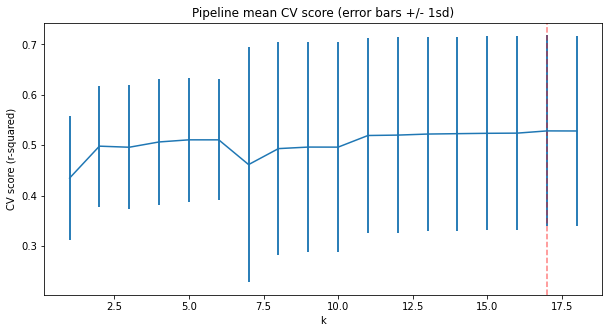

In [24]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The Gridesearch suggest 17 out of 18 features as a best possible perdictor. The only one it didn't chose is the tom_cri_vote and the R_squared between selectin 17 and 18 is same, So I'll chose all 18 for the final model.

We can also check the coef to see which features are more efficent in our perdiction.

In [25]:
features = X_train.columns[lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()]
features

Index(['tom_cri_num', 'tom_aud_vote', 'tom_aud_num', 'met_cri_vote',
       'met_cri_num', 'met_aud_vote', 'met_aud_num', 'imdb_vote', 'imdb_num',
       'imdb_us_vote', 'imdb_us_num', 'imdb_nus_vote', 'imdb_nus_num',
       'imdb_fem_vote', 'imdb_fem_num', 'imdb_mal_vote', 'imdb_mal_num'],
      dtype='object')

In [26]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
pd.Series(coefs, index=features).sort_values(ascending=False)

imdb_mal_vote    1.010365e+07
imdb_fem_vote    9.308870e+06
tom_cri_num      5.519941e+05
tom_aud_vote     3.822191e+05
imdb_nus_vote    9.274825e+04
met_aud_num      8.804505e+04
imdb_num         2.801203e+03
imdb_us_num      1.441960e+03
tom_aud_num      3.325697e+02
imdb_fem_num    -2.102088e+03
imdb_nus_num    -2.210637e+03
imdb_mal_num    -2.477563e+03
met_aud_vote    -5.077223e+04
met_cri_num     -8.829468e+05
met_cri_vote    -9.882122e+05
imdb_us_vote    -3.188504e+06
imdb_vote       -1.651733e+07
dtype: float64

Suprisingly the vote has a high coef in the suggested model in contrast of what we observe in EDA.

Now let's make a model with all the features and run the cross validation to calculate the performance of the model on the training set

In [27]:
pipe2 = make_pipeline(LinearRegression())

In [28]:
cv_results = cross_validate(pipe2, X_train, y_train, cv=5)

In [29]:
cv_results['test_score']

array([0.67616834, 0.16267061, 0.5291684 , 0.63425656, 0.63808289])

In [30]:
np.mean(cv_results['test_score']), np.std(cv_results['test_score'])

(0.5280693609590577, 0.18911872376242136)

In [31]:
mae = cross_val_score(pipe2, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
mae

array([-48807082.18083188, -63142344.44644098, -54720569.62468386,
       -54070638.55148789, -53841337.18416586])

In [32]:
np.mean(mae)

-54916394.39752209

By running the Linear Regression model the mae drop to 54 million from 92 million that we calculate by Dummy Regressor.
So the Linear Regression model doing way better perdiction of the box-office by using the vote information as a predictor but still this is a very large error margine to perdictiong all movie box-office.

Also by looking at the diffrent R^2 result of the cross validation we can see the inconssitency of the dataset, the indie movies make this inconsistency by having a very low box-office.

But what would be the min of mae that we can get? let's do the Gridesearch and chose the mae as a score for it.

In [33]:
lr_grid_cv_minmae = GridSearchCV(pipe1, param_grid=grid_params, cv=5, n_jobs=-1,scoring='neg_mean_absolute_error')

In [34]:
lr_grid_cv_minmae.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7ff59064ad30>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18],
                         'standardscaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

In [35]:
lr_grid_cv_minmae.best_params_

{'selectkbest__k': 10, 'standardscaler': None}

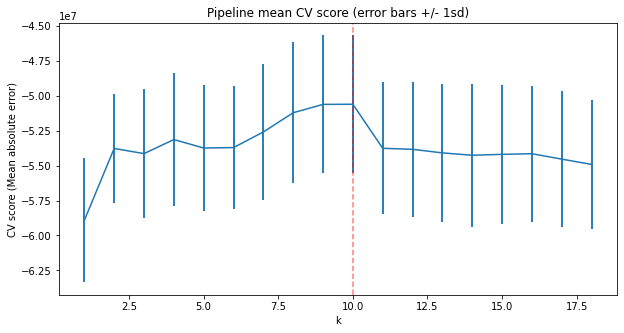

In [36]:
score_mean = lr_grid_cv_minmae.cv_results_['mean_test_score']
score_std = lr_grid_cv_minmae.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv_minmae.cv_results_['param_selectkbest__k']]
best_k = lr_grid_cv_minmae.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (Mean absolute error)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

For having min mae chosing 10 features is best option. let's see what are those features.

In [37]:
features = X_train.columns[lr_grid_cv_minmae.best_estimator_.named_steps.selectkbest.get_support()]
features

Index(['tom_cri_num', 'tom_aud_num', 'met_cri_num', 'met_aud_num', 'imdb_num',
       'imdb_us_num', 'imdb_nus_num', 'imdb_fem_vote', 'imdb_fem_num',
       'imdb_mal_num'],
      dtype='object')

In [38]:
coefs = lr_grid_cv_minmae.best_estimator_.named_steps.linearregression.coef_
pd.Series(coefs, index=features).sort_values(ascending=False)

tom_cri_num      6.076276e+05
met_aud_num      9.179231e+04
imdb_num         2.381937e+03
tom_aud_num      3.920357e+02
imdb_fem_num    -2.462274e+02
imdb_us_num     -4.819834e+02
imdb_mal_num    -1.059792e+03
imdb_nus_num    -3.465499e+03
imdb_fem_vote   -1.030766e+05
met_cri_num     -1.567183e+06
dtype: float64

GrideSearch suggest using all the vote number and one of the vote columns as a perdictor for having a min mae. Let's calculate that.

In [39]:
X_train_minmae = X_train[['tom_cri_num','met_aud_num','imdb_num','tom_aud_num','imdb_fem_num','imdb_us_num',
                         'imdb_mal_num','imdb_nus_num','imdb_fem_vote','met_cri_num']]
X_train_minmae.head()

,tom_cri_num,met_aud_num,imdb_num,tom_aud_num,imdb_fem_num,imdb_us_num,imdb_mal_num,imdb_nus_num,imdb_fem_vote,met_cri_num
409,59,45,18373,832,1733,2773,12040,7711,53,12
837,30,9,260,50,21,89,188,102,66,9
936,44,14,3328,171,357,778,2266,1410,55,9
1155,63,14,4723,100,483,542,2023,1736,64,19
1873,160,156,143295,41227,19317,18157,103218,77268,68,32


In [40]:
reg_minmae = LinearRegression()

In [41]:
cv_results_minmae = cross_validate(reg_minmae, X_train_minmae, y_train, cv=5)

In [42]:
cv_results_minmae['test_score']

array([0.65952984, 0.09105078, 0.50304472, 0.6120939 , 0.61434238])

In [43]:
np.mean(cv_results_minmae['test_score']), np.std(cv_results_minmae['test_score'])

(0.4960123238780221, 0.20892975634718983)

In [44]:
mae_minmae = cross_val_score(reg_minmae, X_train_minmae, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(mae_minmae)

-50613559.98483166

Using the 10 suggested columns return a R^2 score of slightly lower but the mae drop to 50 millions which might be a better option as we have less margine of error for box-office perdiction. 

### Linear Regression : Critics vs Audience

From the Gridserch result we already see that audience votes and number have more importance in compare to critics vote. But how the model using only audience votes do better than a model using only critics votes.

In [45]:
#Spliting the training set and using only critics vote as a traning data

X_train_critic = X_train[['tom_cri_vote','tom_cri_num','met_cri_vote','met_cri_num']]
X_train_critic.head()

,tom_cri_vote,tom_cri_num,met_cri_vote,met_cri_num
409,47,59,35,12
837,100,30,91,9
936,77,44,60,9
1155,67,63,63,19
1873,32,160,40,32


In [46]:
#making a new model for critic and use the critic training set on it
reg_critic = LinearRegression()

In [47]:
cv_results_critic = cross_validate(reg_critic, X_train_critic, y_train, cv=5)

In [48]:
cv_results_critic['test_score']

array([0.39077398, 0.32317393, 0.35401119, 0.3629407 , 0.34750942])

In [49]:
np.mean(cv_results_critic['test_score']), np.std(cv_results_critic['test_score'])

(0.3556818435777583, 0.02195674388719155)

In [50]:
mae_critic = cross_val_score(reg_critic, X_train_critic, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(mae_critic)

-70710393.58129701

Now doing the same step by usuing the audience votes data.

In [51]:
#audience
X_train_audience = X_train[['tom_aud_vote','tom_aud_num','met_aud_vote','met_aud_num','imdb_vote','imdb_num',
                             'imdb_us_vote','imdb_us_num','imdb_nus_vote','imdb_nus_num','imdb_fem_vote',
                             'imdb_fem_num','imdb_mal_vote','imdb_mal_num']]
X_train_audience.head()

,tom_aud_vote,tom_aud_num,met_aud_vote,met_aud_num,imdb_vote,imdb_num,imdb_us_vote,imdb_us_num,imdb_nus_vote,imdb_nus_num,imdb_fem_vote,imdb_fem_num,imdb_mal_vote,imdb_mal_num
409,23,832,46,45,51,18373,50,2773,50,7711,53,1733,51,12040
837,62,50,91,9,70,260,73,89,66,102,66,21,69,188
936,44,171,58,14,55,3328,55,778,54,1410,55,357,55,2266
1155,32,100,76,14,62,4723,63,542,60,1736,64,483,58,2023
1873,52,41227,63,156,66,143295,65,18157,66,77268,68,19317,66,103218


In [52]:
reg_audience = LinearRegression()
cv_results_audience = cross_validate(reg_audience, X_train_audience, y_train, cv=5)

In [53]:
cv_results_audience['test_score']

array([0.66530901, 0.07420447, 0.50175986, 0.63646941, 0.61390215])

In [54]:
np.mean(cv_results_audience['test_score']), np.std(cv_results_audience['test_score'])

(0.49832897953636746, 0.21918742675165642)

In [55]:
mae_audience = cross_val_score(reg_audience, X_train_audience, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(mae_audience)

-53457579.847821236

The model that used the critics vote do way worse than the audience vote. critic model has R^2 of 0.3 and mae of 70 million. The audience model on the other hand has very close score to the general model using all data, while R^2 is slighltly lower but it has a better mae. The general model mae was 55 million and the audience mae is 53 million. 

The best Linear Regression model considering both the R^2 and mae would be the one with 10 features suggested by Gridsearch for having minimum mae ( all the Number of vote columns and one of the vote coulumns). That would gives us the R^2 of 0.5 and mae of 50 millons dollars.

Now Let's try Random Forest Regressor!

### Random Forest

For start let's run a Gridesearch to chose best combination of tree number and maximum depth.

In [56]:
pipe3 = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [57]:
n_estimators = [50,100,150,200,300,400]
max_depth = [40,60,80]
min_samples_leaf = [2]
min_samples_split = [6]
random_grid = {'standardscaler':[StandardScaler(),None],
               'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_leaf': min_samples_leaf ,
               'randomforestregressor__min_samples_split': min_samples_split
               
            }
random_grid

{'standardscaler': [StandardScaler(), None],
 'randomforestregressor__n_estimators': [50, 100, 150, 200, 300, 400],
 'randomforestregressor__max_depth': [40, 60, 80],
 'randomforestregressor__min_samples_leaf': [2],
 'randomforestregressor__min_samples_split': [6]}

In [58]:
rf_grid_cv = GridSearchCV(pipe3, param_grid=random_grid, cv=5, n_jobs=-1)

#### (forsake of running the Gridesearch faster i disable the min_sample_leaf and min_sample_split. Chosing them made the Gridesearch to take 4 hours and gives a slightly better result at the end.)

In [59]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [60]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [40, 60, 80],
                         'randomforestregressor__min_samples_leaf': [2],
                         'randomforestregressor__min_samples_split': [6],
                         'randomforestregressor__n_estimators': [50, 100, 150,
                                                                 200, 300,
                                                                 400],
                         'standardscaler': [StandardScaler(), None]})

In [61]:
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 60,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 6,
 'randomforestregressor__n_estimators': 50,
 'standardscaler': None}

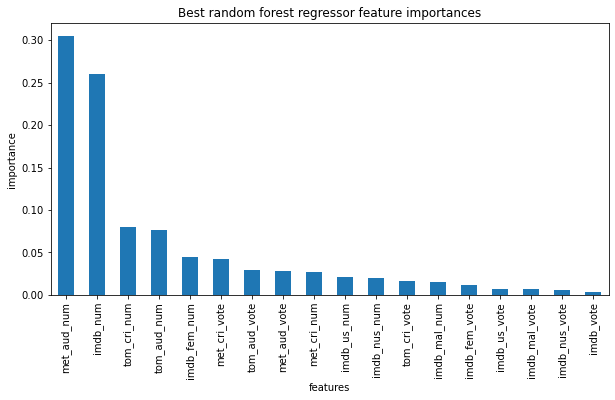

In [62]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Vote Number still has more importance here in compare to vote average.

In [63]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.75465605, 0.48267879, 0.61246999, 0.60850494, 0.71227   ])

In [64]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.634115954270267, 0.09454697816677798)

In [65]:
rf_mae = cross_val_score(rf_grid_cv.best_estimator_, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae)

-40822549.687326

Random Forest Regressor increase the R^2 to 0.62 and drop the mae to 41 millions. This is clearly a better model. 
How about if we chose the mae as a score for GrideSearch.

In [66]:
#chose mae as a score for GrideSearch
rf_grid_cv_minmae = GridSearchCV(pipe3, param_grid=random_grid, cv=5, n_jobs=-1,scoring='neg_mean_absolute_error')

In [67]:
rf_grid_cv_minmae.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [40, 60, 80],
                         'randomforestregressor__min_samples_leaf': [2],
                         'randomforestregressor__min_samples_split': [6],
                         'randomforestregressor__n_estimators': [50, 100, 150,
                                                                 200, 300,
                                                                 400],
                         'standardscaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

In [68]:
rf_grid_cv_minmae.best_params_

{'randomforestregressor__max_depth': 60,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 6,
 'randomforestregressor__n_estimators': 50,
 'standardscaler': None}

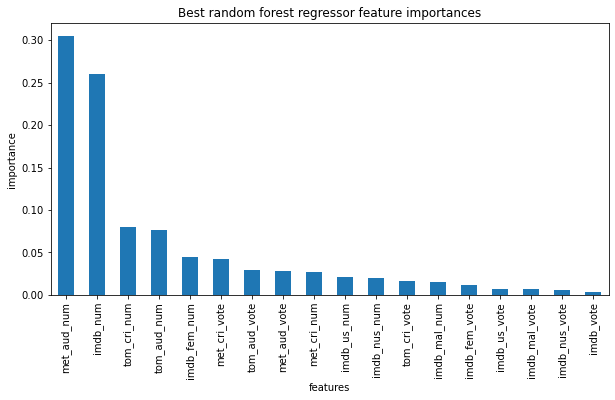

In [69]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv_minmae.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [70]:
rf_best_cv_results_minmae = cross_validate(rf_grid_cv_minmae.best_estimator_, X_train, y_train, cv=5)
rf_best_scores_minmae = rf_best_cv_results_minmae['test_score']
rf_best_scores_minmae

array([0.75465605, 0.48267879, 0.61246999, 0.60850494, 0.71227   ])

In [71]:
np.mean(rf_best_scores_minmae), np.std(rf_best_scores_minmae)

(0.634115954270267, 0.09454697816677798)

In [72]:
rf_mae_minmae = cross_val_score(rf_grid_cv_minmae.best_estimator_, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae_minmae)

-40822549.687326

In Random Forest Regressor chosing mae as a score for Gridesearch didn't make much of a diffrence.

### Random Forest on split data Critics vs Audience

Now let's run the same experiment of spliting data for critic and audience and see the result for Random Forest Regressor.

In [73]:
#make a best model by using the Gridesearch result
pipe4 = make_pipeline(
    RandomForestRegressor(max_depth=60,n_estimators=50,random_state=47,min_samples_leaf= 2,min_samples_split= 6))


In [74]:
#spliting the data for critic and do the cross validation on that set
rf_cv_results_critic = cross_validate(pipe4, X_train_critic, y_train, cv=5)

In [75]:
rf_cv_results_critic['test_score']

array([0.43392813, 0.29609609, 0.39306538, 0.38061837, 0.43335565])

In [76]:
np.mean(rf_cv_results_critic['test_score']),np.std(rf_cv_results_critic['test_score'])

(0.3874127260542145, 0.050381103381540136)

In [77]:
rf_mae_critic = cross_val_score(pipe4, X_train_critic, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae_critic)

-59186644.8412658

In [78]:
#spliting the audience data and cross validation to check the scores
rf_cv_results_audience = cross_validate(pipe4, X_train_audience, y_train, cv=5)

In [79]:
rf_cv_results_audience['test_score']

array([0.6908849 , 0.45072099, 0.52711067, 0.61787162, 0.65895158])

In [80]:
np.mean(rf_cv_results_audience['test_score']),np.std(rf_cv_results_audience['test_score'])

(0.5891079503164377, 0.08838398256335975)

In [81]:
rf_mae_audience = cross_val_score(pipe4, X_train_audience, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae_audience)

-42642499.0502774

Same result as Linear Regression. Audience data as a train set returns a result very close to whole data, but critic data on itself returns very bad scores.

### Lasso Model:

In [82]:
pipe5 = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    Lasso())

pipe5.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [83]:
k = [k+1 for k in range(len(X_train.columns))]
alphas = np.linspace(0, 0.2, 21)
grid_params = {
                #'standardscaler':[StandardScaler(),None],
                #'selectkbest__k' : k,
                'lasso__alpha' : alphas,
                
}
grid_params

{'lasso__alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])}

In [84]:
lasso_grid_cv = GridSearchCV(pipe5, param_grid=grid_params, cv=5, n_jobs=-1,scoring='neg_mean_absolute_error')
lasso_grid_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7916351809715366e+19, tolerance: 8033922771110858.0
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7ff59064ad30>)),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])},
             scoring='neg_mean_absolute_error')

In [85]:
lasso_grid_cv.best_params_,lasso_grid_cv.best_score_

({'lasso__alpha': 0.2}, -50747032.87483515)

### ElasticNet

In [86]:
pipe6 = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    ElasticNet())

pipe6.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'elasticnet', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'elasticnet__alpha', 'elasticnet__copy_X', 'elasticnet__fit_intercept', 'elasticnet__l1_ratio', 'elasticnet__max_iter', 'elasticnet__normalize', 'elasticnet__positive', 'elasticnet__precompute', 'elasticnet__random_state', 'elasticnet__selection', 'elasticnet__tol', 'elasticnet__warm_start'])

In [87]:
k = [k+1 for k in range(len(X_train.columns))]
alphas = np.linspace(0, 0.2, 21)
l1_ratio = np.arange(0, 1, 0.1)
grid_params = {
                #'standardscaler':[StandardScaler(),None],
                #'selectkbest__k' : k,
                'elasticnet__alpha' : alphas,
                'elasticnet__l1_ratio': l1_ratio
    
                
}
grid_params

{'elasticnet__alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
 'elasticnet__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

In [88]:
elasticnet_grid_cv = GridSearchCV(pipe6, param_grid=grid_params, cv=5, n_jobs=-1,scoring='neg_mean_absolute_error')
elasticnet_grid_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8368225485141449e+19, tolerance: 8033922771110858.0
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7ff59064ad30>)),
                                       ('elasticnet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                         'elasticnet__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [89]:
elasticnet_grid_cv.best_params_,elasticnet_grid_cv.best_score_

({'elasticnet__alpha': 0.04, 'elasticnet__l1_ratio': 0.9}, -50010670.458356306)

### Conclusion:
 
* Amoung all the model I try for this dataset, Random Forest Regressor with tuned Hyperparameters returns the best result. R^2 Score = 0.63
* Best model still has a mae of 40 million dollars when we perdict the box-office. ( the Dummy Reressor mae using the mean as a predictor was 95 million). This is a good margine of error if we try to perdict the box-office of a blockbuster or average movie. But for the Indie movie that the box-office is around 5 millions we cant use the vote data to do any perdiction.
* Audience voting data that gathered from diffrent website on its own can perform as good as the whole vote dataset. But model result if we use only Critics voting data decreased drastically.
* Number of vote also has a more weight in the model in compare to average of the given vote. We can observe that easily in most important feature of the Random Forest model.